In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:

def get_x(N, iters, eta, seed_val = 42):
    np.random.seed(seed_val)
    mean_gaussian = 0
    var_gaussian = eta**2 / N
    stdev_gaussian = np.sqrt(var_gaussian)
    A = mean_gaussian + stdev_gaussian * np.random.randn(N, N)
    covar_matrix = A @ A.T
    L, v = np.linalg.eig(covar_matrix)    
    x = np.zeros((N,iters))
    for ii in range(iters):
        eps = np.random.normal(0, 1, N)
        x[:, ii] = A @ eps
    return x, L, v

def linear_neuron(x, w):
    return w @ x

def project_vector(v, u):
    proj_v = ((v @ u)/(np.linalg.norm(u)**2)) * u
    return proj_v


Largest eigenvector of covariance matrix is [-0.04479906 -0.99899602]
Weight matrix converges to [-0.06154726 -0.99813962]


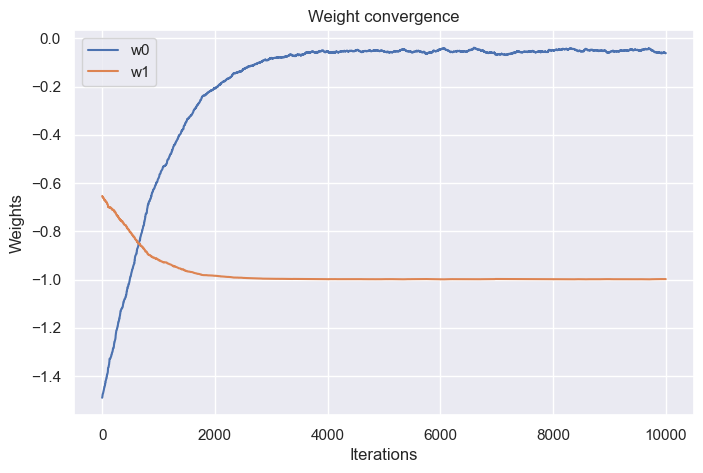

In [10]:
N = 2
eta = 1
iters = 10000
alpha =  0.001
x, L, v = get_x(N, iters, eta)
PC1 = v[:, np.argmax(L)]
PC2 = v[:, np.argmin(L)]
print(f'Largest eigenvector of covariance matrix is {PC1}')
w = np.zeros((N, iters))
w[:, 0] = np.random.normal(0, 1, N)
for ii in range(iters - 1):
    y = linear_neuron(x[:, ii], w[:, ii])
    w[:, ii+1] = w[:, ii] + alpha * y * (x[:, ii] - y * w[:, ii])
print(f'Weight matrix converges to {w[:, -1]}')
plt.figure(figsize = (8, 5))
for kk in range(N):
    plt.plot(w[kk, :], label = f'w{kk}')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Weight convergence')
plt.legend()
plt.show()


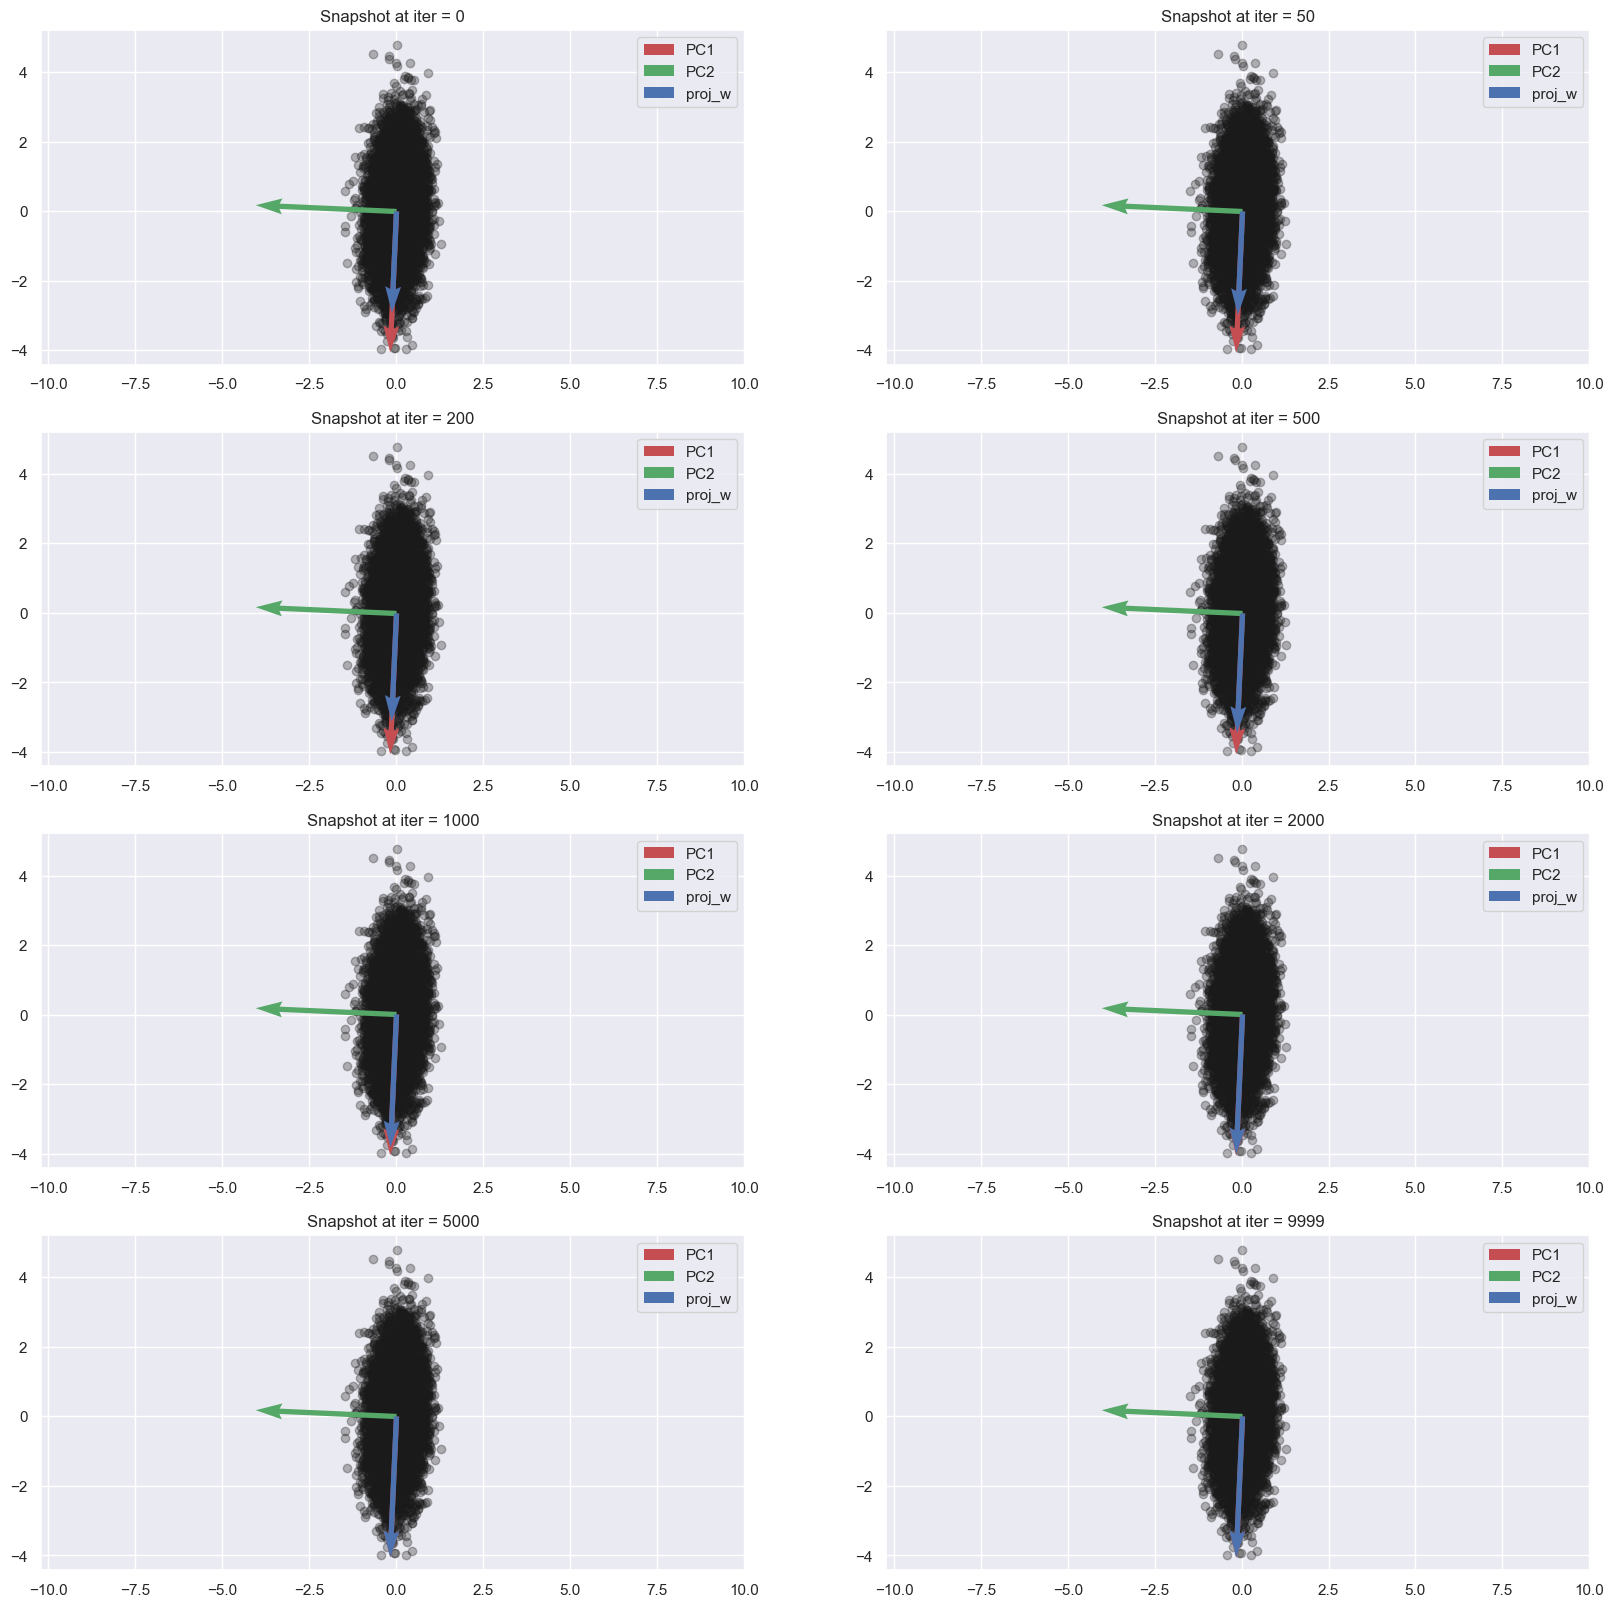

In [11]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))
axs_x = [0, 0, 1, 1, 2, 2, 3, 3]
axs_y = [0, 1, 0, 1, 0, 1, 0, 1]
iter_plots = [0, 50, 200, 500, 1000, 2000, 5000, 9999]
origin = np.mean(x, 1)
for ii in range(len(iter_plots)):
    axs[axs_x[ii], axs_y[ii]].scatter(x[0, :], x[1, :], alpha = 0.3, color = 'k')
    proj_w = project_vector(w[:,iter_plots[ii]], PC1)
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, PC1[0], PC1[1], color = 'r', scale = 5, label = 'PC1')
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, PC2[0], PC2[1], color = 'g', scale = 5, label = 'PC2')
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, proj_w[0], proj_w[1], color = 'b', scale = 5, label = 'proj_w')
    axs[axs_x[ii], axs_y[ii]].axis('equal')
    axs[axs_x[ii], axs_y[ii]].set_title(f'Snapshot at iter = {iter_plots[ii]}')
    axs[axs_x[ii], axs_y[ii]].legend()
plt.show()


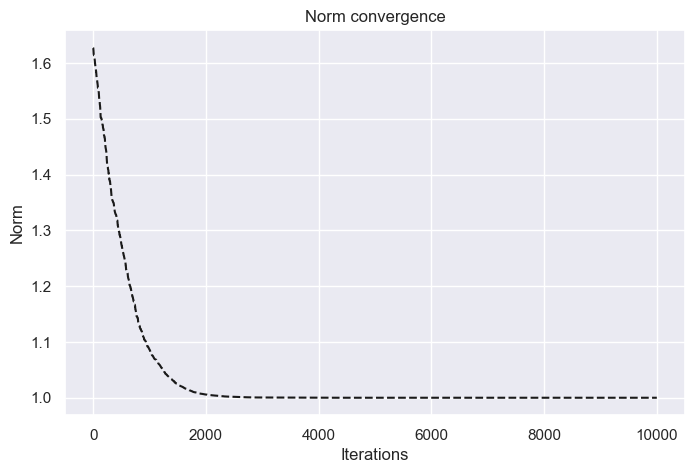

In [12]:
plt.figure(figsize = (8, 5))
w_norm_iter = np.linalg.norm(w,axis= 0)
plt.plot(np.arange(iters), w_norm_iter, 'k--')
plt.xlabel('Iterations')
plt.ylabel('Norm')
plt.title('Norm convergence')
plt.show()

(10, 10000)
(10,)
Largest eigenvector of covariance matrix is [ 0.06188762 -0.49548501 -0.22215168  0.0783565  -0.49266583  0.30131677
  0.03900968 -0.57229677 -0.09916722 -0.15093879]
Weight matrix converges to [ 0.10231252 -0.53499296 -0.21501669 -0.00906622 -0.47061317  0.32486238
  0.02799142 -0.54142744 -0.11013193 -0.16334407]


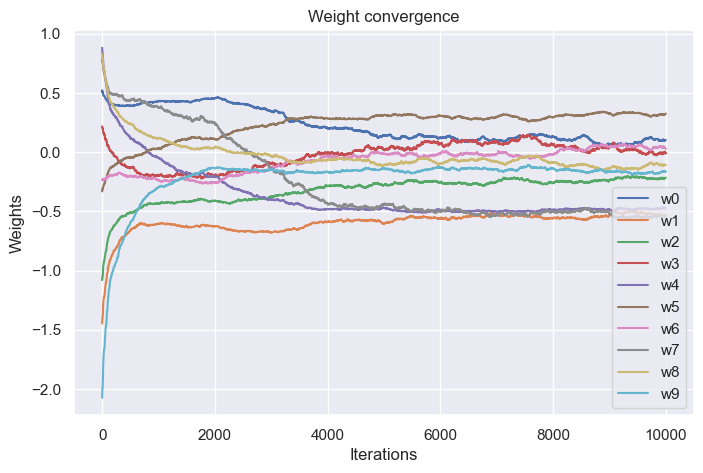

In [13]:
N = 10
eta = 1
iters = 10000
alpha =  0.001
x, L, v = get_x(N, iters, eta)
PC1 = v[:, np.argmax(L)]
print(x.shape)
print(PC1.shape)
PC2 = v[:, np.argmin(L)]
print(f'Largest eigenvector of covariance matrix is {PC1}')
w = np.zeros((N, iters))
w[:, 0] = np.random.normal(0, 1, N)
for ii in range(iters - 1):
    y = linear_neuron(x[:, ii], w[:, ii])
    w[:, ii+1] = w[:, ii] + alpha * y * (x[:, ii] - y * w[:, ii])
print(f'Weight matrix converges to {w[:, -1]}')
plt.figure(figsize = (8, 5))
for kk in range(N):
    plt.plot(w[kk, :], label = f'w{kk}')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Weight convergence')
plt.legend()
plt.show()

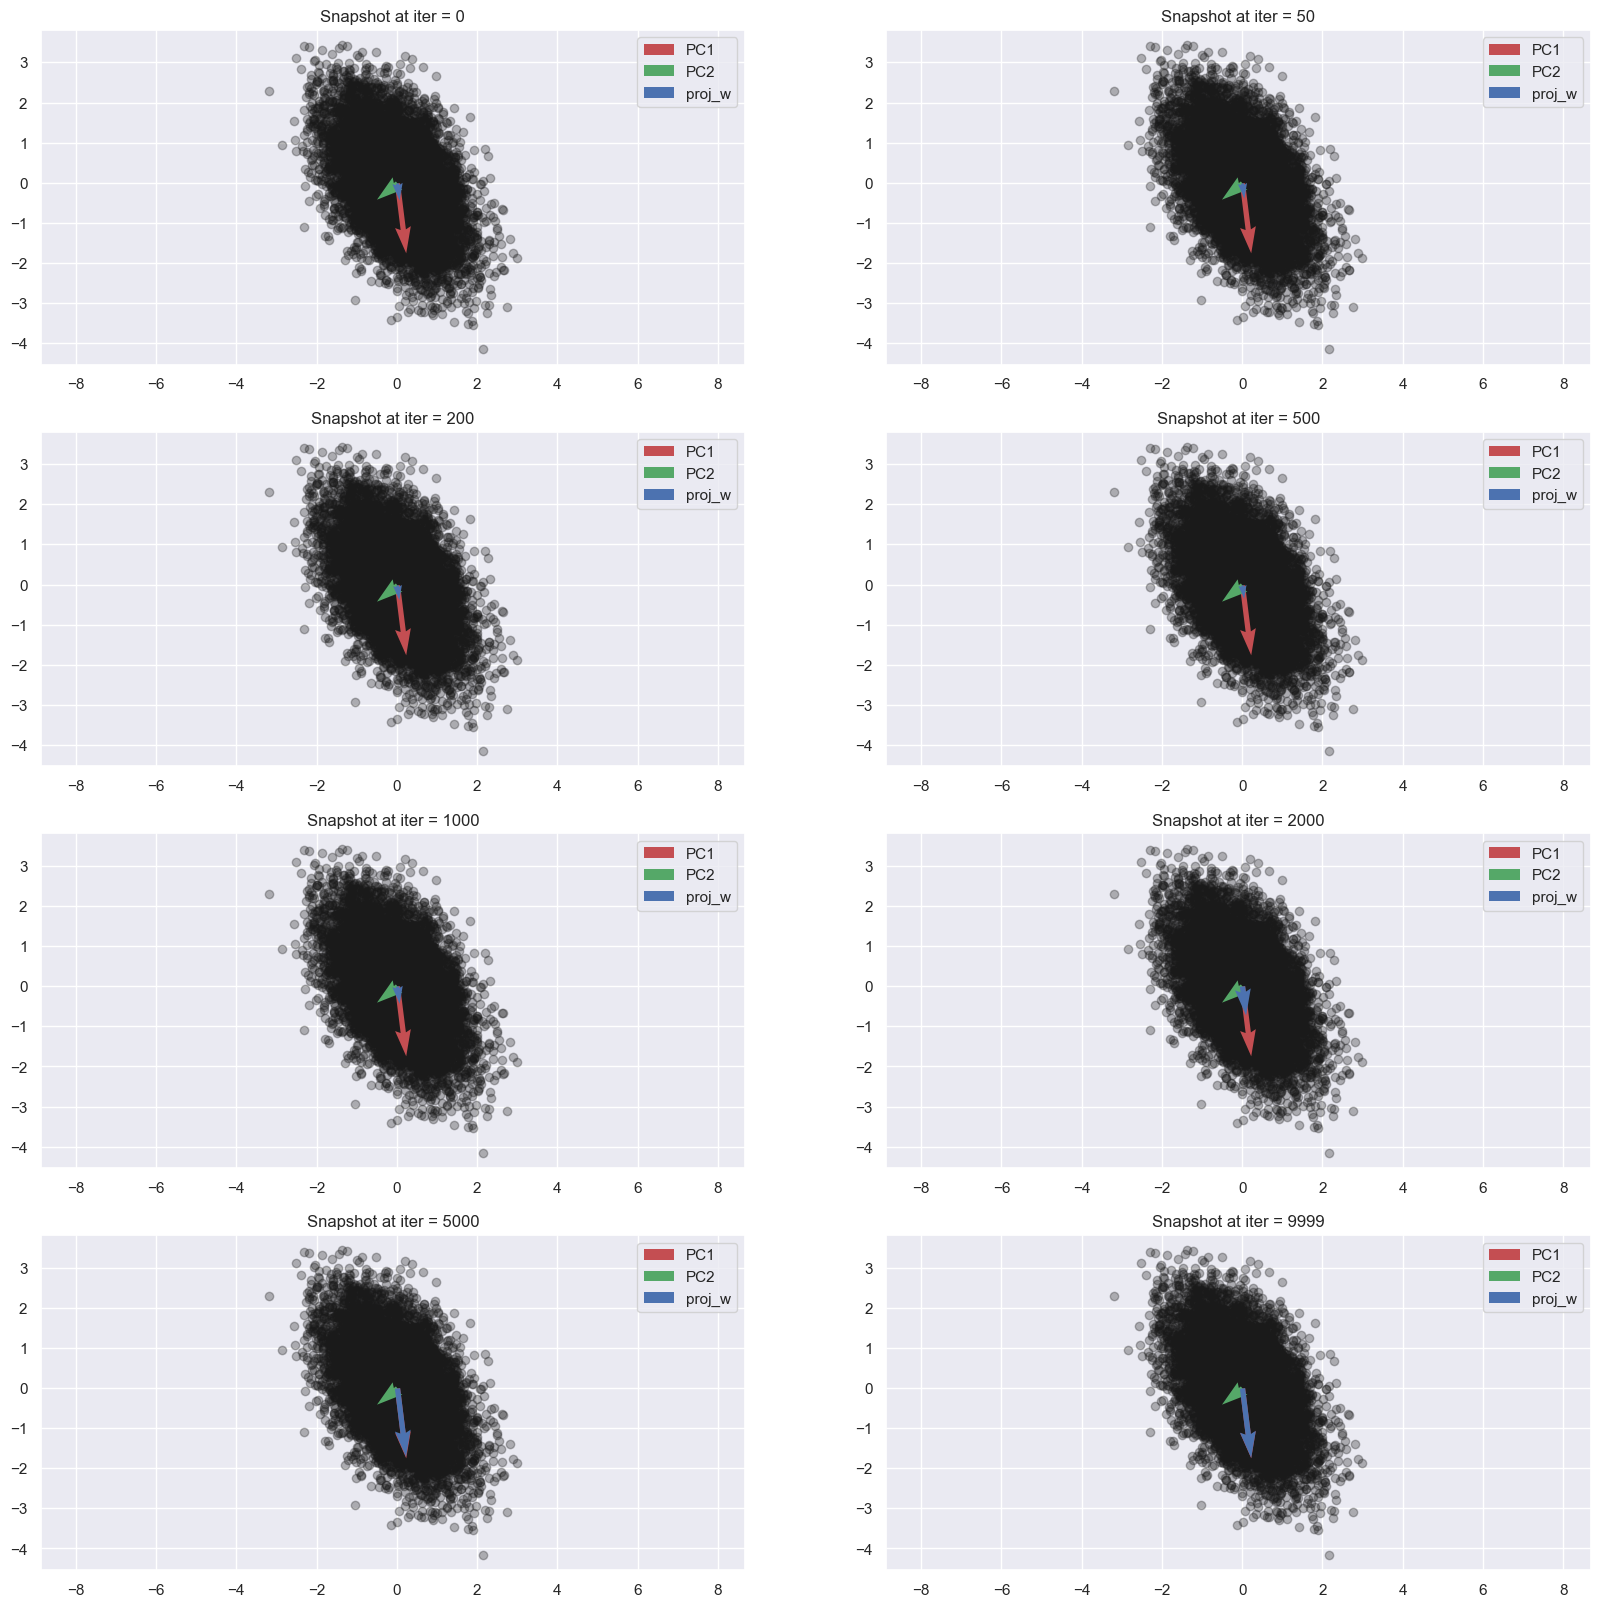

In [14]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))
axs_x = [0, 0, 1, 1, 2, 2, 3, 3]
axs_y = [0, 1, 0, 1, 0, 1, 0, 1]
iter_plots = [0, 50, 200, 500, 1000, 2000, 5000, 9999]
origin = np.mean(x, 1)[0:2]
for ii in range(len(iter_plots)):
    axs[axs_x[ii], axs_y[ii]].scatter(x[0, :], x[1, :], alpha = 0.3, color = 'k')
    proj_w = project_vector(w[:,iter_plots[ii]], PC1)
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, PC1[0], PC1[1], color = 'r', scale = 5, label = 'PC1')
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, PC2[0], PC2[1], color = 'g', scale = 5, label = 'PC2')
    axs[axs_x[ii], axs_y[ii]].quiver(*origin, proj_w[0], proj_w[1], color = 'b', scale = 5, label = 'proj_w')
    axs[axs_x[ii], axs_y[ii]].axis('equal')
    axs[axs_x[ii], axs_y[ii]].set_title(f'Snapshot at iter = {iter_plots[ii]}')
    axs[axs_x[ii], axs_y[ii]].legend()
plt.show()